In [1]:
import glob
import json
import os
from urllib.request import urlretrieve
from multiprocessing import Pool
from collections import defaultdict, namedtuple
from pprint import pprint
import tqdm
from collections import Counter
import string
from matplotlib import pyplot as plt
import numpy as np
import pymorphy2
#import pandas as pd
%matplotlib inline

In [2]:
my_messages = []

files_list=glob.glob(os.path.join('dumps/nikkorobk', '*/*.json'))
for file in tqdm.tqdm_notebook(files_list):
    data = json.load(open(file))
    
    for m in data['items']:
        if m['out']:
            my_messages.append(m)

In [3]:
morph = pymorphy2.MorphAnalyzer()

morph.parse('поехали')[0].normal_form


'поехать'

In [4]:
qcount = 0

for m in tqdm.tqdm_notebook(my_messages):
    m['lemmatize'] = list(filter(lambda x: x, map(lambda x: morph.parse(x.strip(string.punctuation))[0].normal_form, m['text'].lower().split())))
    m['len'] = len(m['lemmatize'])
    if m['text']:
        m['is_q'] = m['text'].count('?')>0


In [5]:
my_messages[555]

{'date': 1545251624,
 'from_id': 21854966,
 'id': 283961,
 'out': 1,
 'peer_id': 9468306,
 'text': 'Еще есть вопрос про хату в лагере. \nЕсли ехать туда на нг, сколько народу там реально полжить спать и в каких условиях ?\nГриша говорит ты шаришь лучше всех.',
 'conversation_message_id': 6451,
 'fwd_messages': [],
 'important': False,
 'random_id': 1716296581,
 'attachments': [],
 'is_hidden': False}

In [6]:
all_used_words = []
all_lens = []
qcount = 0
for m in my_messages:
    all_used_words.extend(m['lemmatize'])
    all_lens.append(m.get('len'))
    if m.get('is_q'):
        qcount +=1 

In [7]:
c = Counter(all_used_words)
cl = Counter(all_lens)

In [8]:
#bad calculations, should use kv pairs from c directly
print(len(my_messages), 'total messages')
print(len(all_used_words), 'total words:')
print(qcount, 'questions')
print('unique words:' , len(set(all_used_words)))
print('twice used words', len(set(filter(lambda x: c.get(x)>1, all_used_words))))
print('3-times used words', len(set(filter(lambda x: c.get(x)>2, all_used_words))))
print('4-times used words', len(set(filter(lambda x: c.get(x)>3, all_used_words))))
print('5-times used words', len(set(filter(lambda x: c.get(x)>4, all_used_words))))

66180 total messages
575197 total words:
11482 questions
unique words: 26450
twice used words 12955
3-times used words 9246
4-times used words 7351
5-times used words 6204


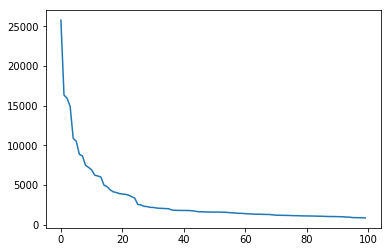

In [32]:
mc  = np.array(c.most_common(100))
plt.plot(np.arange(len(mc[:,0])),list(map(int,mc[:,1])))
plt.show()

In [18]:
convs = []

files_list=glob.glob(os.path.join('dumps/nikkorobk', '*/*.json'))
for file in tqdm.tqdm_notebook(files_list):
    data = json.load(open(file))
    d = {}
    d['chat'] = 0 < data.get('conversations')[0].get('peer').get('id') < 2000000000
    d['len'] = data['count']
    d['in'] = len(list(filter(lambda x: not x['out'], data['items'])))
    d['profiles'] = list((filter(lambda x: x.get('screen_name') != 'nikkorobk', data['profiles'])))
    d['id'] = int(file.split('/')[-2])
    convs.append(d)

In [13]:
conv_lens = {'chat':[], 'dialog':[]}

for c in convs:
    if c.get('chat'):
        conv_lens['chat'].append(c.get('len'))
    else:
        conv_lens['dialog'].append(c.get('len'))
        

    

In [4]:
dialogs = list(filter(lambda x:  x.get('chat'), convs ))
dialogs.sort(key=lambda x: -x.get('len'))

for d in dialogs:
    try:
        g = list(filter(lambda x: x['id'] == d['id'], d['profiles']))[0]
    except IndexError as e:
        g = {'first_name': 'me','last_name':'me'}
    print(d['len'], d['in'], g['first_name'], g['last_name'])

NameError: name 'convs' is not defined

In [5]:
from urllib.request import urlretrieve


In [8]:
a, b = urlretrieve('https://pp.userapi.com/c849124/v849124216/374d7/pc3RDNrrfcw.jpg', 't.mp3')

In [18]:
b.get_param('Content-Length')